# Assigment 04: Due 10/1

You can use these imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [166]:
n=100
x0=0
x1=2

def f(x):
    return 2/((2**2+x**2)**(3/2))

In [118]:
x = np.linspace(x0,x1,n)
y = f(x)
fmax = max(y)
print('fmax = ',fmax)
x_rand = x0 + (x1 - x0)*np.random.random(n) 
y_rand = np.random.random(n)*fmax
ind_below = np.where(y_rand < f(x_rand))
ind_above = np.where(y_rand >= f(x_rand))
ratio = float(len(ind_below[0])/n)
area = (x1-x0)*fmax
integral = ratio*area
print(' ratio: {0}\n area: {1}\n integral: {2}\n'.format(ratio,area,integral))

fmax =  0.25
 ratio: 0.7089
 area: 0.5
 integral: 0.35445



# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

<IPython.core.display.Javascript object>


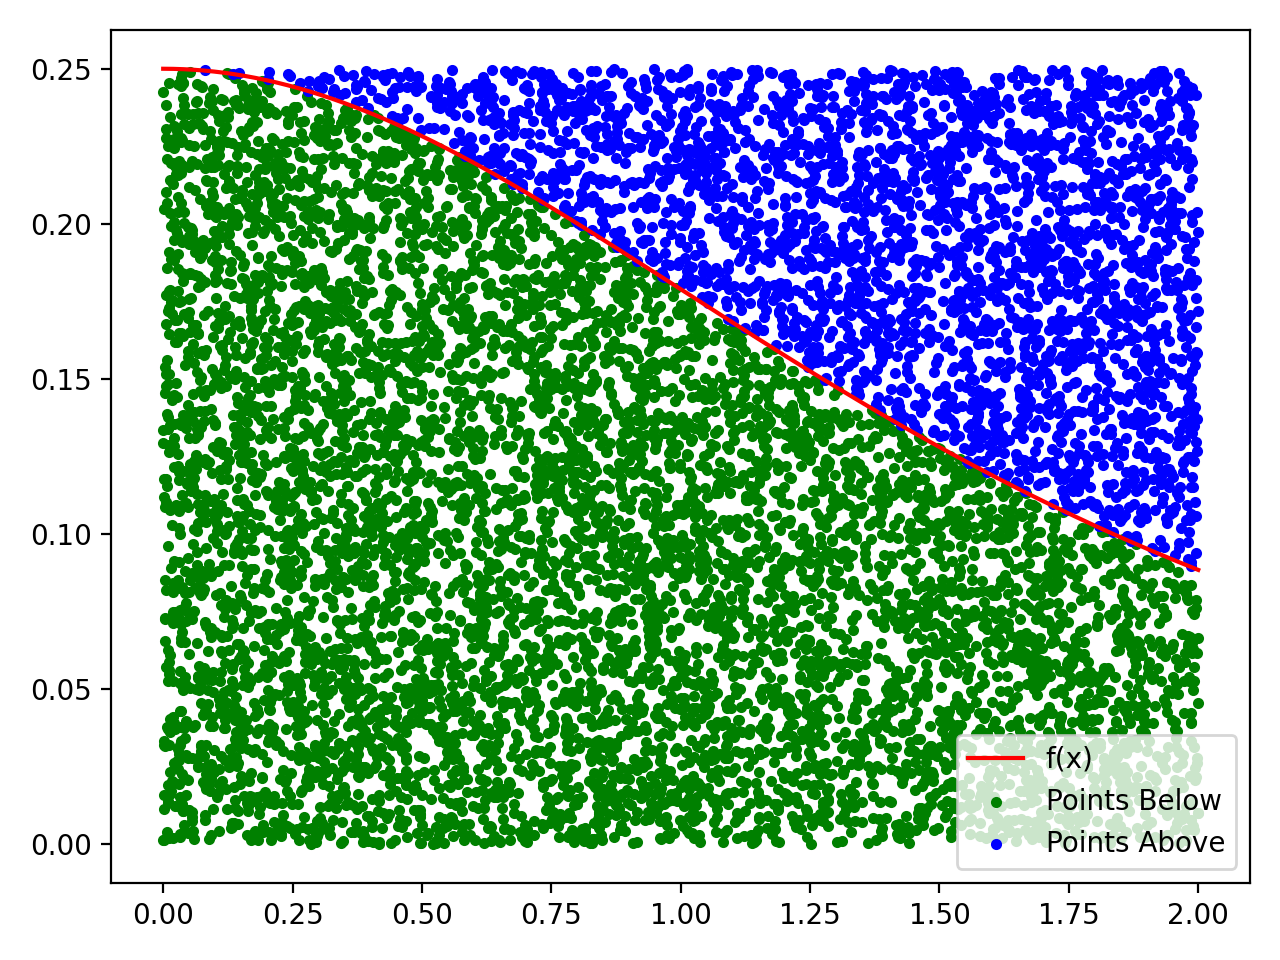

In [119]:
fig = plt.figure('MC Integration')
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout();

# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertianty on the particles. This is the same radio active decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


<IPython.core.display.Javascript object>


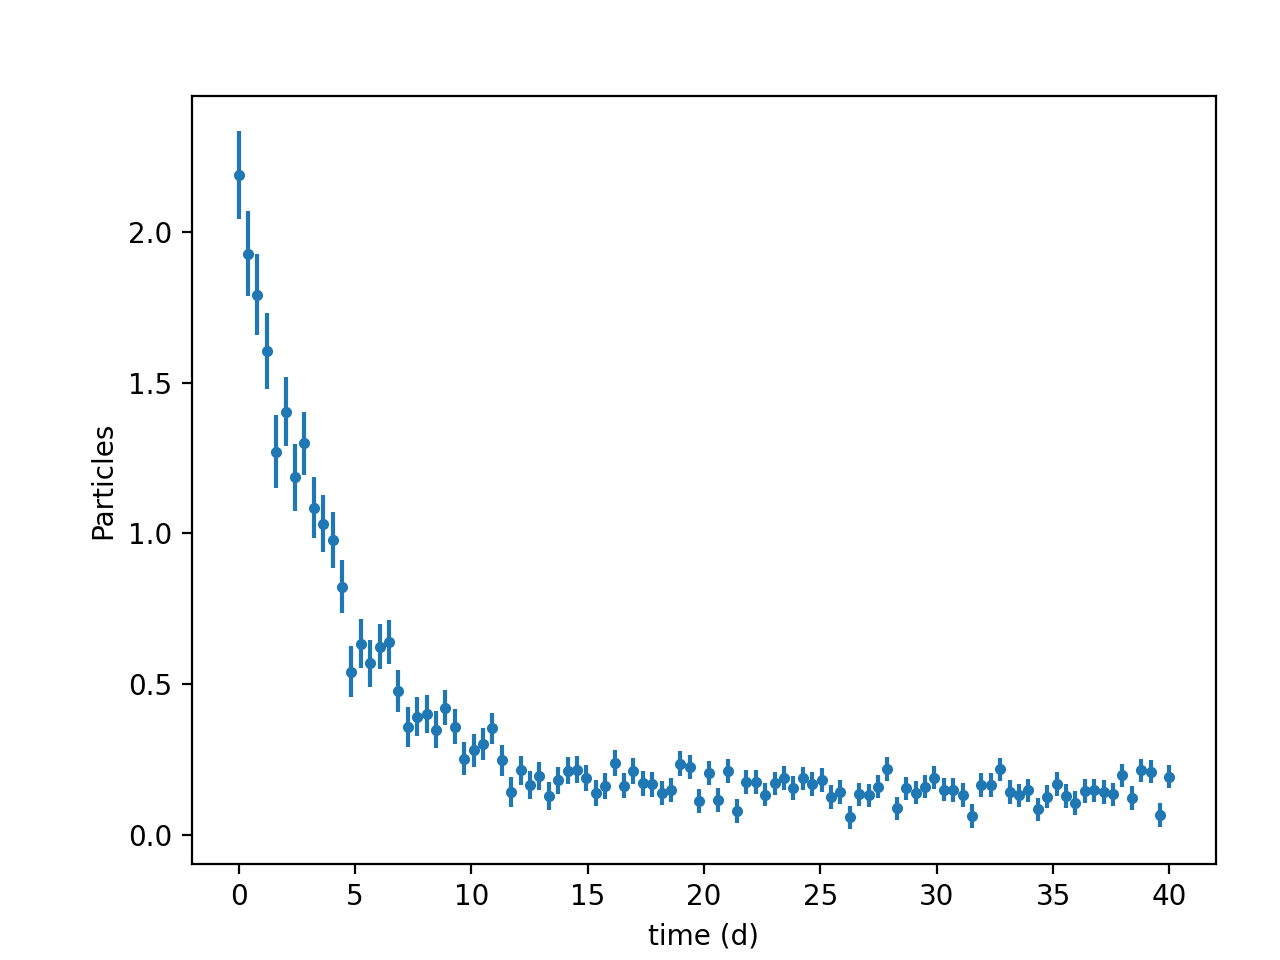

In [208]:
decay = np.loadtxt('data/decay_data.txt')
t = decay[:,0]
N = decay[:,1]
N_error = decay[:,2]
fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])
axes.errorbar(t, N, yerr = N_error, fmt='.')
axes.set_xlabel('time (d)')
axes.set_ylabel('Particles');

# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [217]:

def f_line(t, a, b, c): 
    return a * np.exp(-t/b) + c

def get_chi_squared(t, N, N_error, params):
    for i in range(len(N)):
        N_prime = params[0]*np.exp(-1*t/params[1]) + params[2]
        RR = np.sum( (N[i] - N_prime)/N_error[i])**2
    return RR 


In [218]:
init_par = np.array([2.0,1.0,1.0])
par_list, RRs = [init_par], [get_chi_squared(t, N, N_error, init_par)]

for i in range (n):
    test_par = [np.random.normal(par_list[-1][0], N_error[i]),np.random.normal(par_list[-1][1],N_error[i]),np.random.normal(par_list[-1][2],N_error[i])]
    RR_test = get_chi_squared(t,N,N_error,test_par)
    RRs.append(RR_test)
    par_list.append(test_par)
    t1 = ((np.random.random() <= (RRs[-1])/RR_test))
    
    if t1:
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])
        
RR_min = np.amin(RRs)
chisq = RR_min
best_i = (RRs.index(RR_min))
best_pars = par_list[best_i] 
print("best p0 = {0}, best p1 = {1}, best p2 = {2}, chi**2 = {3}, loc = {4}".format(best_pars[0], best_pars[1], best_pars[2], RR_min, best_i) ) 
   

best p0 = 1.5112385903869312, best p1 = 1.1975117326580003, best p2 = 0.46603651948895075, chi**2 = 712542.1510346021, loc = 171


# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [219]:
dof= len(N) -len(init_par)-1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue)

 chi2 =  712542.1510346021 
 dof =  96 
 reduced chi2 =  7422.314073277105 
 p-value =  0.0


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


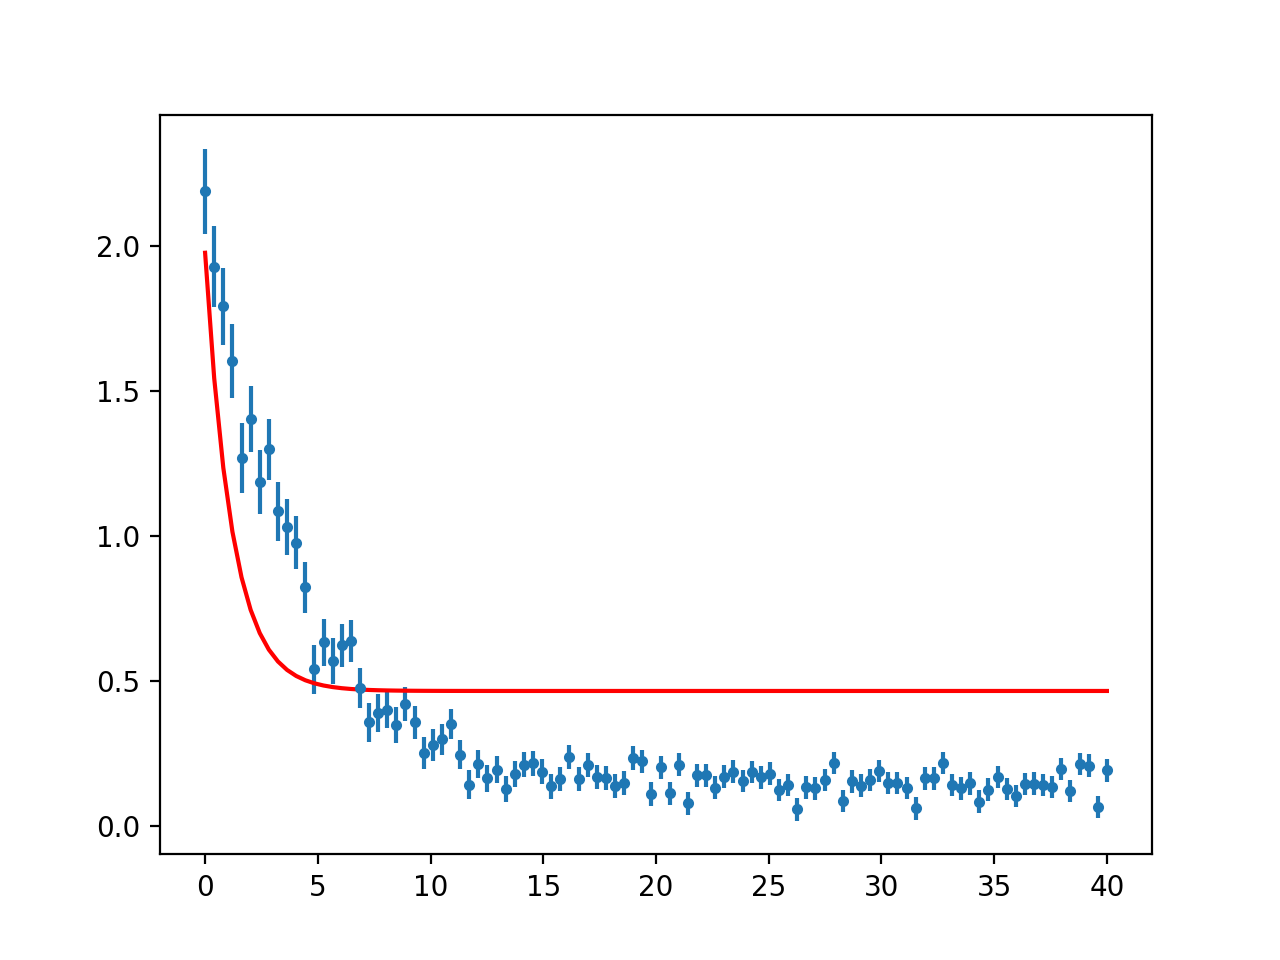

In [220]:
fig = plt.figure('Fitted Data Set')
plt.errorbar(t, N, yerr = N_error, fmt='.')
plt.plot(t,f_line(t,*best_pars),'r')

# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


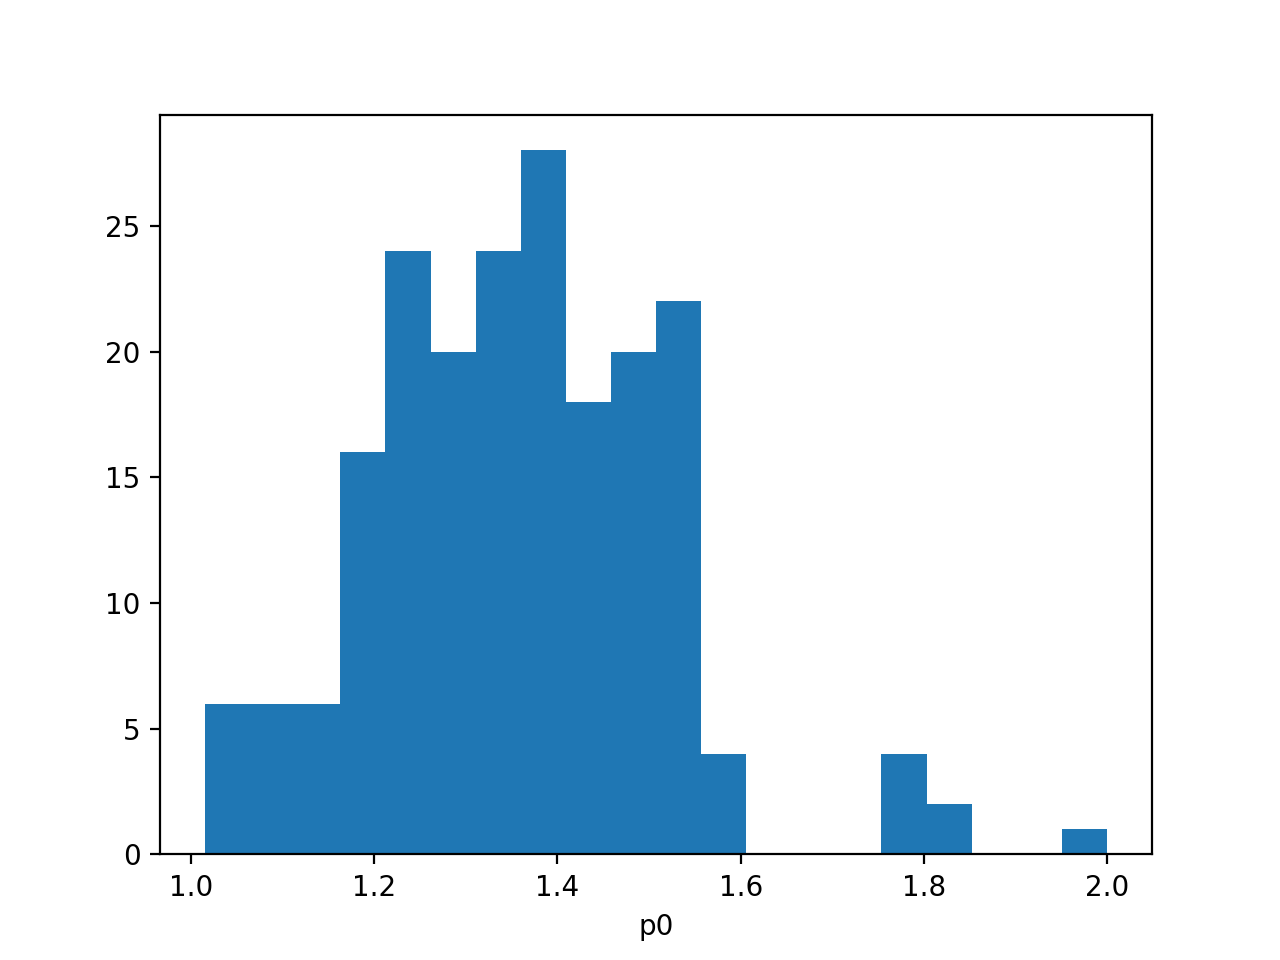

<IPython.core.display.Javascript object>


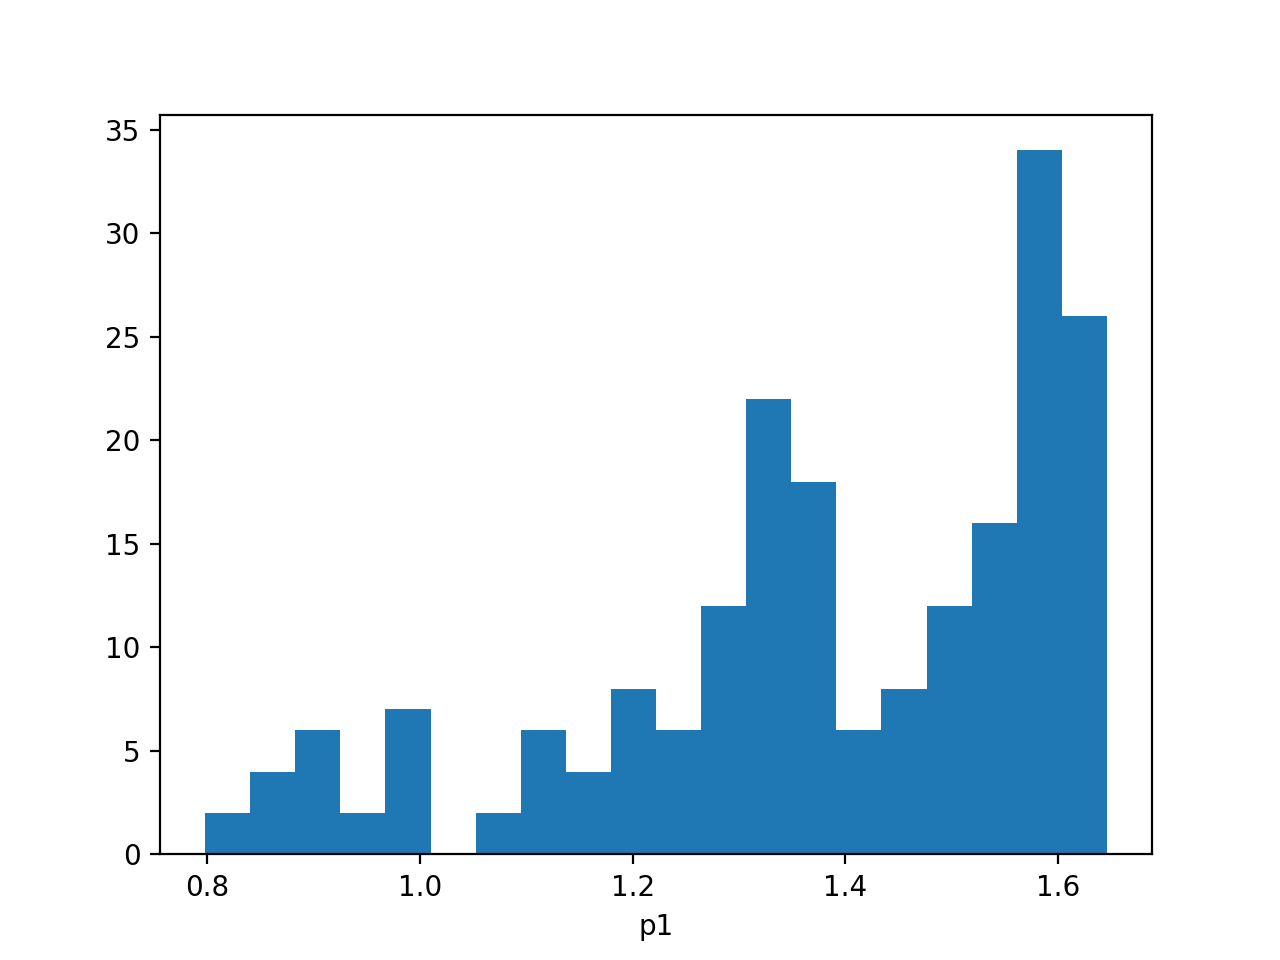

<IPython.core.display.Javascript object>


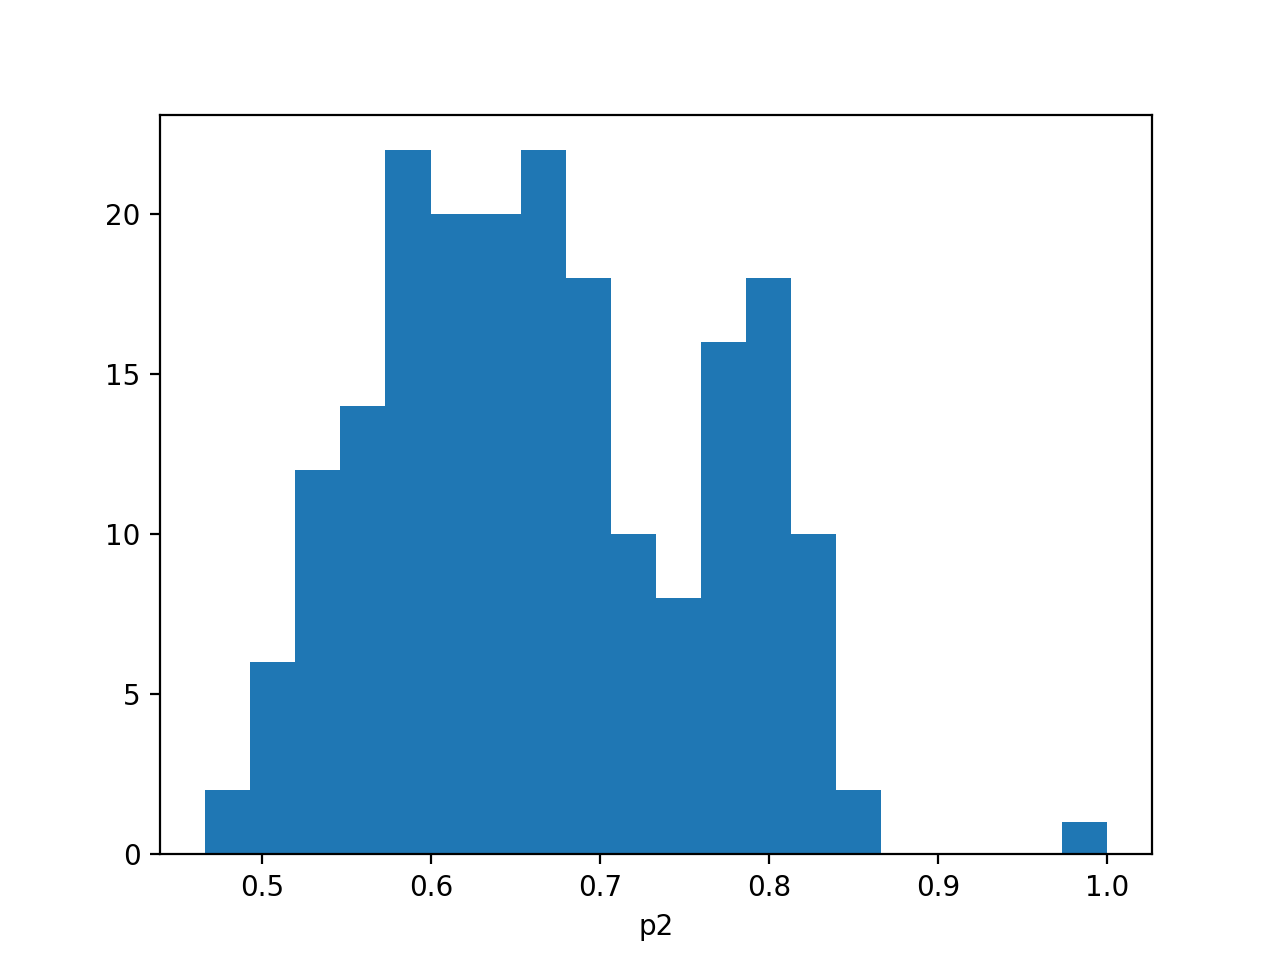

Text(0.5, 0, 'p2')

In [221]:
ps = np.array(par_list)
fig1 = plt.figure("1")
plt.hist(ps[:,0], bins=20)
plt.xlabel("p0")

fig2 = plt.figure("2")
plt.hist(ps[:,1], bins=20)
plt.xlabel("p1")

fig3 = plt.figure("3")
plt.hist(ps[:,2], bins=20)
plt.xlabel("p2")